# Analysis of CSR Expenditure and Demographics in India

This notebook presents an in-depth analysis of state expenditure and demographic factors in India. The dataset used contains information about the amount spent by various Indian states during the fiscal years 2019-2020, 2020-2021, and 2021-2022, along with population and poverty rate data. The goal of this analysis is to gain valuable insights into the CSR spending patterns of different states, explore correlations between spending and demographic factors, and identify trends and growth patterns. By examining this data, we aim to provide a comprehensive understanding of how fiscal decisions and demographics interplay in India's diverse regions.

## Imports

In [1]:
%%capture
pip install pandas numpy matplotlib seaborn ipywidgets scikit-learn openpyxl geopandas mplleaflet

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Set Seaborn style
sns.set(style="whitegrid")

## Load Data

In [3]:
excel_file_path = 'data/StateWiseView.xlsx'
data = pd.read_excel(excel_file_path, sheet_name=0)
data.rename(columns={'population':"Population"}, inplace=True)
data.head()

,State,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.),Population,Poverty rate
0,Bihar,110.48,89.89,165.66,128500364,33.76
1,Jharkhand,155.21,226.54,192.41,40100376,28.81
2,Meghalaya,17.65,17.63,19.30,3772103,27.79
3,Uttar Pradesh,577.98,907.32,1321.36,231502578,22.93
4,Madhya Pradesh,220.46,375.51,420.04,85002417,20.63


In [4]:
hdi_df = pd.read_excel('data/state_HDI.xlsx', header=1)

# Check if 'Unnamed: 0' column exists before attempting to drop it
if 'Unnamed: 0' in hdi_df.columns:
    hdi_df = hdi_df.drop('Unnamed: 0', axis=1)
hdi_df.head()

data = data.merge(hdi_df, left_on='State', right_on="State/Union Territory", how='inner')
data.head()

,State,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.),Population,Poverty rate,Rank,State/Union Territory,HDI (2021),Country comparison
0,Bihar,110.48,89.89,165.66,128500364,33.76,34,Bihar,0.571,Republic of the Congo
1,Jharkhand,155.21,226.54,192.41,40100376,28.81,33,Jharkhand,0.589,Angola
2,Meghalaya,17.65,17.63,19.30,3772103,27.79,21,Meghalaya,0.643,Tuvalu
3,Uttar Pradesh,577.98,907.32,1321.36,231502578,22.93,32,Uttar Pradesh,0.592,Zimbabwe
4,Madhya Pradesh,220.46,375.51,420.04,85002417,20.63,31,Madhya Pradesh,0.596,Equatorial Guinea


In [5]:
# Descriptive Statistics
# Calculate basic statistics for numeric columns
desc_stats = data.describe()
desc_stats

,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.),Population,Poverty rate,HDI (2021)
count,32.000000,32.000000,32.000000,3.200000e+01,32.000000,32.000000
mean,428.564062,458.734688,588.124688,4.416897e+07,10.897813,0.663062
std,653.044228,683.359113,982.482441,5.187731e+07,8.807686,0.051314
min,0.000000,0.010000,0.450000,6.600100e+04,0.550000,0.571000
25%,17.132500,16.310000,39.002500,3.095980e+06,4.442500,0.627750
50%,204.950000,203.385000,229.165000,3.135037e+07,7.955000,0.668500
75%,611.042500,638.282500,658.675000,7.267573e+07,15.492500,0.696000
max,3353.240000,3464.810000,5229.310000,2.315026e+08,33.760000,0.752000


## Exploratory Data Analysis

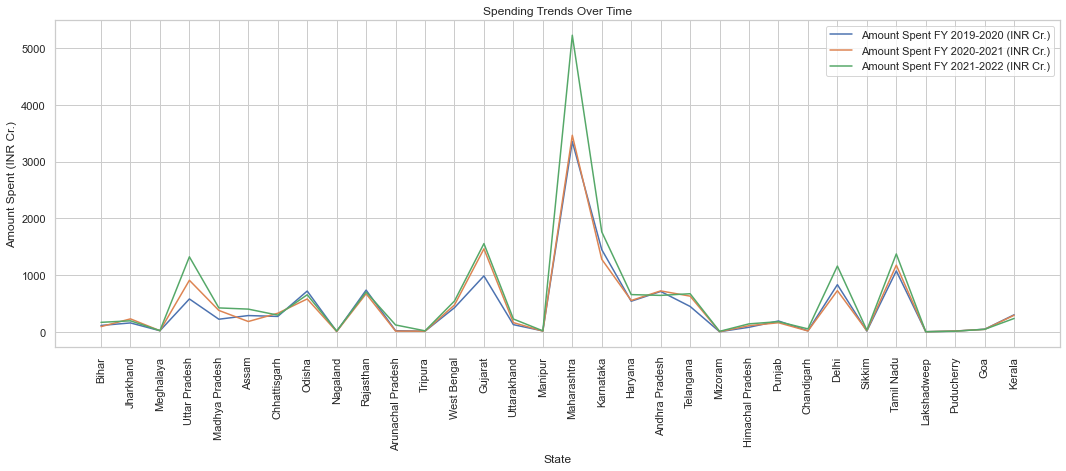

In [6]:
# Comparative Analysis - Spending patterns over the years
# Create a line plot to visualize spending trends for each state over time
plt.figure(figsize=(18, 6))
for col in data.columns[1:4]:  # Columns with spending data
    sns.lineplot(data=data, x='State', y=col, label=col)
plt.title('Spending Trends Over Time')
plt.xlabel('State')
plt.ylabel('Amount Spent (INR Cr.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [7]:
# Sort the data by poverty rate in descending order
sorted_data = data.sort_values(by='Poverty rate', ascending=False)

# Get the top 5 states with the highest poverty rates
top_5_states = sorted_data.head(5)

# Extract the columns for expenditures per year
expenditure_columns = ['Amount Spent FY 2019-2020 (INR Cr.)', 'Amount Spent FY 2020-2021 (INR Cr.)', 'Amount Spent FY 2021-2022 (INR Cr.)']

# Create a DataFrame with the top 5 states and their corresponding expenditures for each year
result_df = top_5_states[['State', 'Poverty rate', 'Population'] + expenditure_columns]

# Display the DataFrame
print("5 states with the highest poverty rate and their expenditure")
result_df

5 states with the highest poverty rate and their expenditure


,State,Poverty rate,Population,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.)
0,Bihar,33.76,128500364,110.48,89.89,165.66
1,Jharkhand,28.81,40100376,155.21,226.54,192.41
2,Meghalaya,27.79,3772103,17.65,17.63,19.30
3,Uttar Pradesh,22.93,231502578,577.98,907.32,1321.36
4,Madhya Pradesh,20.63,85002417,220.46,375.51,420.04


In [11]:
def calculate_correlation(data, field1, field2):
    # Calculate the correlation between field1 and field2
    correlation = data[field1].corr(data[field2])
    return correlation

# Example of how to use the function
population_spending_corr = calculate_correlation(data, 'Population', 'Amount Spent FY 2021-2022 (INR Cr.)')
poverty_rate_spending_corr = calculate_correlation(data, 'Poverty rate', 'Amount Spent FY 2021-2022 (INR Cr.)')
hdi_spending_corr = calculate_correlation(data, 'HDI (2021)', 'Amount Spent FY 2021-2022 (INR Cr.)')

print(f"Correlation between Population and Spending (FY 2021-2022): {population_spending_corr:.2f}")
print(f"Correlation between Poverty Rate and Spending (FY 2021-2022): {poverty_rate_spending_corr:.2f}")
print(f"Correlation between HDI (2021) and Spending (FY 2021-2022): {hdi_spending_corr:.2f}")

Correlation between Population and Spending (FY 2021-2022): 0.54
Correlation between Poverty Rate and Spending (FY 2021-2022): -0.06
Correlation between HDI (2021) and Spending (FY 2021-2022): -0.03


In [14]:
# Create a widget to select the year
year_selector = widgets.Dropdown(
    options=['2019-2020', '2020-2021', '2021-2022'],
    value='2021-2022',
    description='Select Year:',
)

# Function to update and display the linear regression chart
def update_chart(selected_year, new_field):
    # Extract CSR spending and the selected field for the selected year
    csr_spending = data[f'Amount Spent FY {selected_year} (INR Cr.)']
    selected_field = data[new_field]

    # Reshape the data for Linear Regression
    csr_spending = csr_spending.values.reshape(-1, 1)
    selected_field = selected_field.values.reshape(-1, 1)

    # Create a Linear Regression model
    model = LinearRegression()
    model.fit(selected_field, csr_spending)

    # Make predictions using the model
    predictions = model.predict(selected_field)

    # Create a scatter plot of the data points
    plt.figure(figsize=(20, 6))
    plt.scatter(selected_field, csr_spending, color='blue', label='Data Points')

    # Plot the regression line
    plt.plot(selected_field, predictions, color='red', linewidth=2, label='Linear Regression')

    # Customize the plot
    plt.title(f'Linear Regression: {new_field} vs. CSR Spending ({selected_year})', fontsize=16)
    plt.xlabel(f'{new_field}')
    plt.ylabel(f'CSR Spending {selected_year} (INR Cr.)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
    


# Create an interactive widget that updates the chart
interactive_plot = interactive(update_chart, selected_year=year_selector, new_field=['Poverty rate', 'Population', 'HDI (2021)'])

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', index=2, options=('2019-2020', '2020-2021', '2021-2…

Parliamentary Constituencies Maps are provided by [Data{Meet} Community Maps Project](http://projects.datameet.org/maps/). Its made available under the [Creative Commons Attribution 2.5 India](http://creativecommons.org/licenses/by/2.5/in/).

In [10]:
# Load the shapefile containing state boundaries
shapefile = 'States/Admin2.shp'
gdf = gpd.read_file(shapefile)
gdf = gdf.rename(columns={"ST_NM": "State"})

# Create a function to update the choropleth map
def update_map(year):
    # Merge the shapefile data with your DataFrame (assuming a common column, e.g., 'State')
    merged = gdf.set_index('State').join(data.set_index('State'))

    # Create a choropleth map based on the selected year
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged.plot(column=f'Amount Spent FY {year} (INR Cr.)', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Customize the plot
    ax.set_title(f'Expenditure by State ({year})')
    ax.axis('off')

    # Show the map
    plt.show()

# Create a widget to select the year
year_selector = widgets.Dropdown(
    options=['2019-2020', '2020-2021', '2021-2022'],
    value='2021-2022',
    description='Select Year:'
)

# Create an interactive widget to update the map
interactive_map = widgets.interactive(update_map, year=year_selector)

# Display the interactive widget
display(interactive_map)

interactive(children=(Dropdown(description='Select Year:', index=2, options=('2019-2020', '2020-2021', '2021-2…